In [10]:
import re
import numpy as np

file_300 = open('tri/300k/log.lammps')
file_600 = open('../9x9x9/tri/300k/log.lammps')

line_300 = file_300.readlines()
line_600 = file_600.readlines()

data_300 = line_300[176:6177] + line_300[6235:16235]
data_600 = line_600[284:16285]

time = []
time_scaled = []
time2 = []
time2_scaled = []

sorted_300 = []
sorted_600 = []

energy_300 = []
energy_unit_300 = []
energy_600 = []
energy_unit_600 = []


for dat in data_300[:9950]:
    split = re.split(' +', dat)
    sorted_300.append(float(split[2]))
    time.append(float(split[1]))
    
for dat in data_300[9950:]:
    split = re.split(' +', dat)
    sorted_300.append(float(split[1]))
    time.append(float(split[0]))
    
for dat in data_600[:9950]:
    split = re.split(' +', dat)
    sorted_600.append(float(split[2]))
    time2.append(float(split[1]))
    
for dat in data_600[9950:]:
    split = re.split(' +', dat)
    sorted_600.append(float(split[1]))
    time2.append(float(split[0]))
    
for t in time:
    time_scaled.append(t/1000000)
    
for t in time2:
    time2_scaled.append(t/1000000)
    
###################    

for dat in data_300[:9950]:
    split = re.split(' +', dat)
    energy_300.append(float(split[5]))
    
for dat in data_300[9950:]:
    split = re.split(' +', dat)
    energy_300.append(float(split[4]))
    
for dat in energy_300:
    energy_unit_300.append(dat/27648)
    
for dat in data_600[:9950]:
    split = re.split(' +', dat)
    energy_600.append(float(split[5]))
    
for dat in data_600[9950:]:
    split = re.split(' +', dat)
    energy_600.append(float(split[4]))
    
for dat in energy_600:
    energy_unit_600.append(dat/27648)

ValueError: could not convert string to float: 'of'

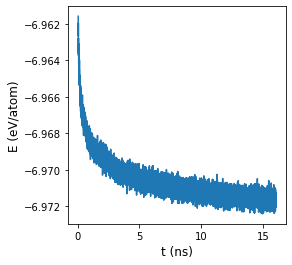

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(time_scaled, energy_unit_300)

plt.ylabel('E/unit (eV)', size=12)
plt.xlabel('t (ns)', size=12)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())
    
make_square_axes(plt.gca())

plt.ylabel('E (eV/atom)', size=12)
plt.xlabel('t (ns)', size=12)

plt.savefig('ener_comp.jpg', bbox_inches='tight', dpi=500)